<h1 align="center">MNAF2025</h1>

### IMPORTS NECESARIOS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sympy as sym
import mpl_toolkits.mplot3d as p3d
import numpy.polynomial.polynomial as poly

### EJERCICIOS

**Ejercicio 1: Crear una función que calcule la base de polinomios de Lagrange, con las siguientes condiciones**

- nombre y parámetros: base_lagrange(x)
- resultado: lista con $L_n^k(x)$, polinomios de la base de lagrange para el soporte {x}

tipo: <class 'list'>, valor: [-2, -1, 1, 2]
[Polynomial([-0.16666667,  0.08333333,  0.16666667, -0.08333333], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'), Polynomial([ 0.66666667, -0.66666667, -0.16666667,  0.16666667], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'), Polynomial([ 0.66666667,  0.66666667, -0.16666667, -0.16666667], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'), Polynomial([-0.16666667, -0.08333333,  0.16666667,  0.08333333], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')]


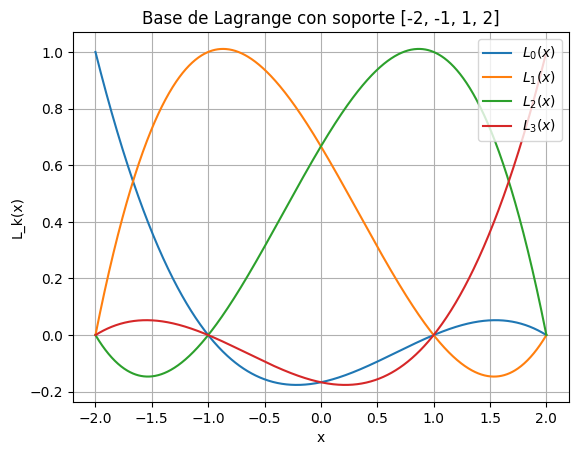

la suma es 1.0 + (4.16333634e-17)·x


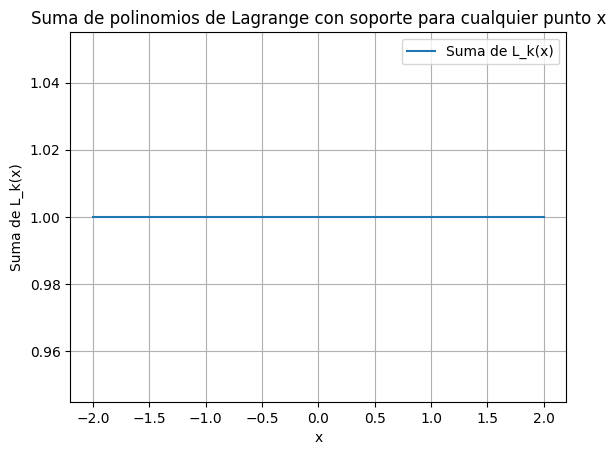

In [ ]:

def obtener_polinomios_lagrange(datos_entrada):

    L=[]
    suma=0

    # * Preparar datos de entrada como lista

    if isinstance(datos_entrada, tuple):
        datos_entrada = list(datos_entrada)
    elif isinstance(datos_entrada, np.ndarray):
        datos_entrada = datos_entrada.tolist()
    elif isinstance(datos_entrada, list):
        pass
    else:
        raise ValueError("Tipo de dato no soportado")
    print(f"tipo: {type(datos_entrada)}, valor: {datos_entrada}")
    
    # * Crear datos de salida: polinomios de Lagrange

    for i in range(len(datos_entrada)):
        soporte = datos_entrada.copy()
        x_k = soporte.pop(i)
        P = poly.Polynomial.fromroots(soporte)
        L_k = P/P(x_k)
        L.append(L_k)
    print(L)

    # * Graficar los polinomios de Lagrange

    x_vals = np.linspace(min(datos_entrada), max(datos_entrada), 1000)
    plt.figure()
    plt.title(f"Base de Lagrange con soporte {datos_entrada}")
    plt.xlabel("x")
    plt.ylabel("L_k(x)")
    plt.grid()
    for L_k in L:
        y_vals = L_k(x_vals)
        plt.plot(x_vals, y_vals, label=f"$L_{L.index(L_k)}(x)$")
        suma += L_k

    plt.legend()
    plt.show()

    # * Ver si la suma tiene sentido

    print(f"la suma es {suma}")
    plt.figure()
    plt.title(f"Suma de polinomios de Lagrange")
    plt.xlabel("x")
    plt.ylabel("Suma de L_k(x)")
    plt.grid()
    y_vals = suma(x_vals)
    plt.plot(x_vals, y_vals, label=f"Suma de L_k(x)")
    plt.legend()
    plt.show()

    # * Lo que devuelve la función

    return L


base_lagrange = obtener_polinomios_lagrange((-2,-1,1,2))